In [17]:
#To register MainEnvRL with local copy of Gym
"""
from gym.envs.registration import register
 
register(
    id='MainEnvRL-v2',
    #entry_point='balance_bot.envs:BalancebotEnv',
    entry_point='MainEnv_RL.envs:MainEnvRL',
)

"""
#import gym
#for env in gym.envs.registry.env_specs:
#    print(env)
    
    #if 'MainEnvRL-v1' == env:
    #     print('Remove {} from registry'.format(env))
         #del gym.envs.registry.env_specs[env]
            
            
#import MainEnv_RL

#env = gym.make('MainEnvRL-v2')
#env.reset()


In [2]:
"""
import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

env = gym.make('CartPole-v1')
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
# env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=0)
model.learn(total_timesteps=10000)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
"""

"\nimport gym\n\nfrom stable_baselines.common.policies import MlpPolicy\nfrom stable_baselines.common.vec_env import DummyVecEnv\nfrom stable_baselines import PPO2\n\nenv = gym.make('CartPole-v1')\n# Optional: PPO2 requires a vectorized environment to run\n# the env is now wrapped automatically when passing it to the constructor\n# env = DummyVecEnv([lambda: env])\n\nmodel = PPO2(MlpPolicy, env, verbose=0)\nmodel.learn(total_timesteps=10000)\n\nobs = env.reset()\nfor i in range(1000):\n    action, _states = model.predict(obs)\n    obs, rewards, dones, info = env.step(action)\n    env.render()\n"

## Train the policy

Ep. 650


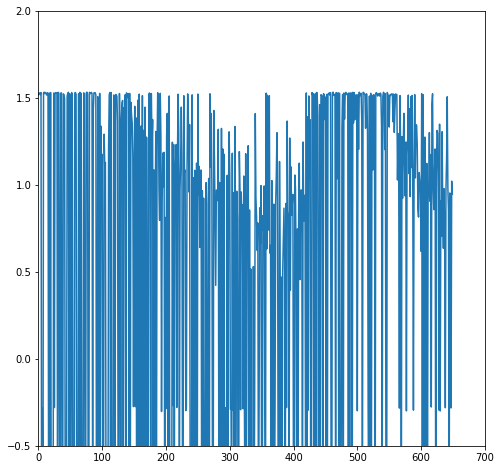

Ep: 650 Dist (m) 0.07748888376560256  Reward: 0.9480436422701974  Final Position:  [0.65, 0.1, 0.739] Time: 20:44:21
Ep: 660 Dist (m) 0.0  Reward: 0.5357501279247466  Final Position:  [0.64, 0.097, 0.739] Time: 20:44:30
Ep: 670 Dist (m) 0.12432616453742533  Reward: 1.5191134828216064  Final Position:  [0.675, 0.106, 0.739] Time: 20:44:39
Ep: 680 Dist (m) 0.0633814524235779  Reward: 1.4933039018078642  Final Position:  [0.667, 0.095, 0.739] Time: 20:44:48
Ep: 690 Dist (m) 0.06920678386713598  Reward: 1.2665284624396314  Final Position:  [0.662, 0.095, 0.739] Time: 20:44:57


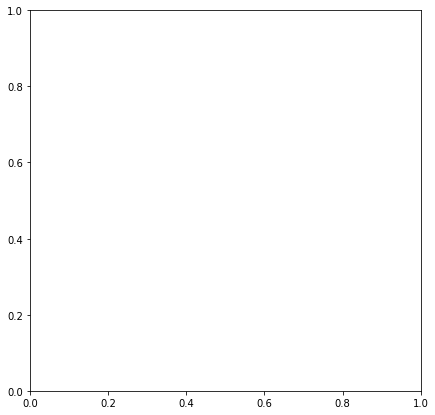

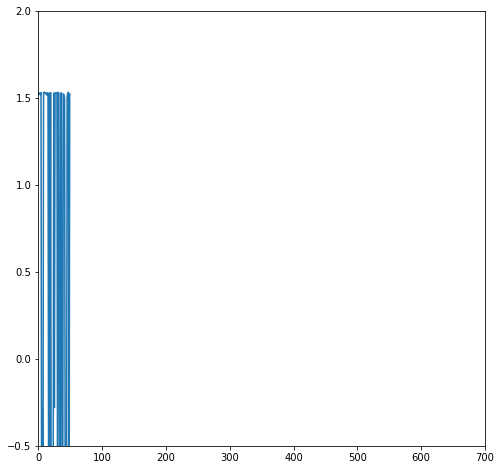

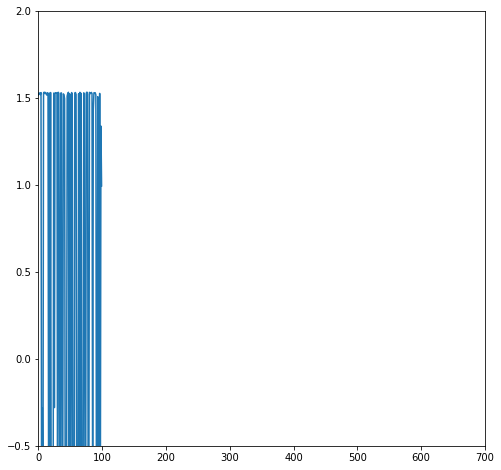

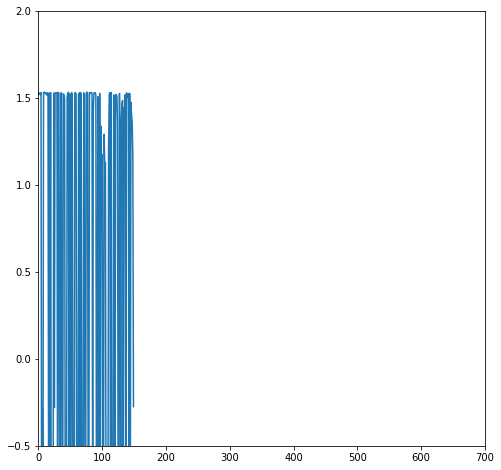

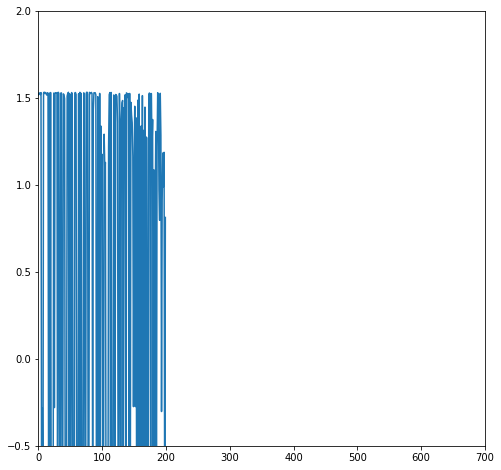

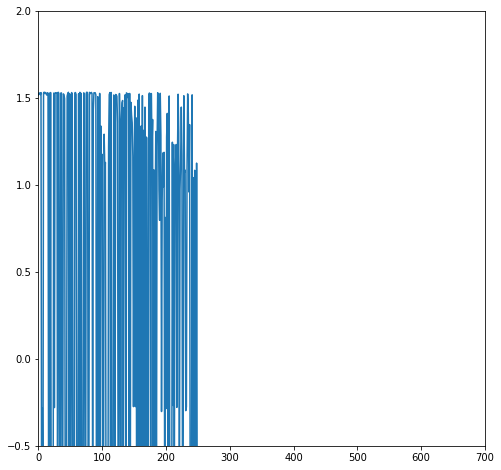

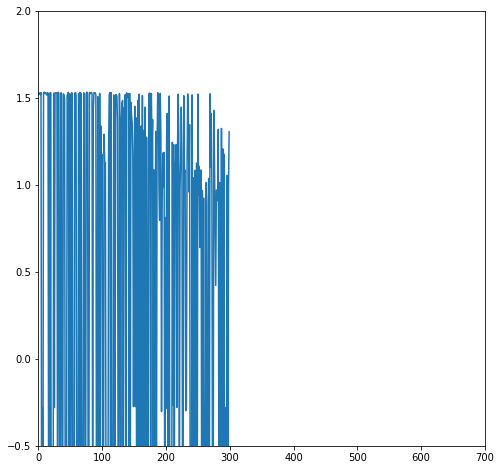

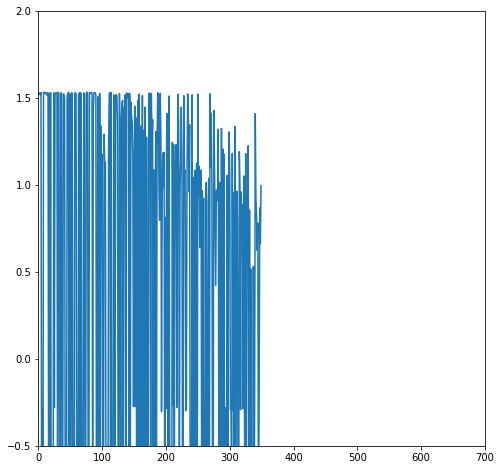

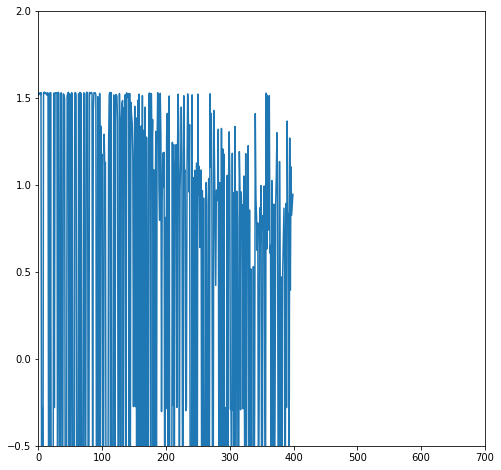

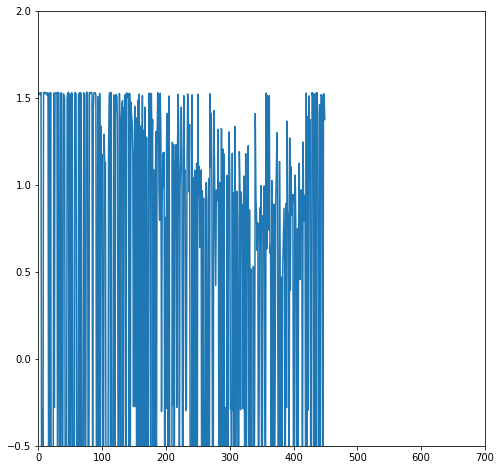

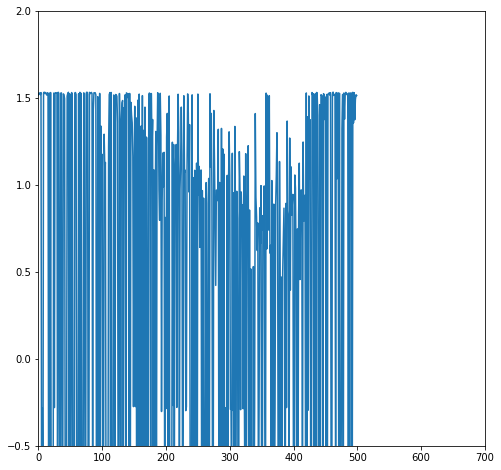

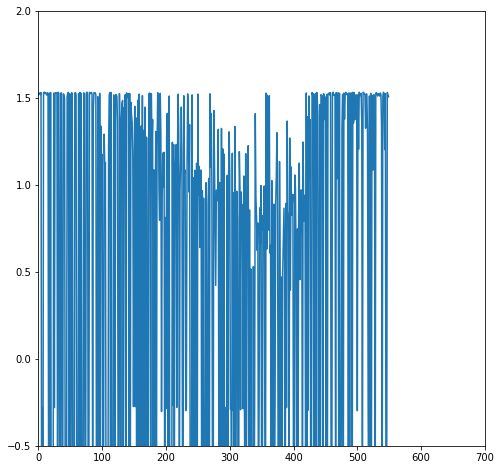

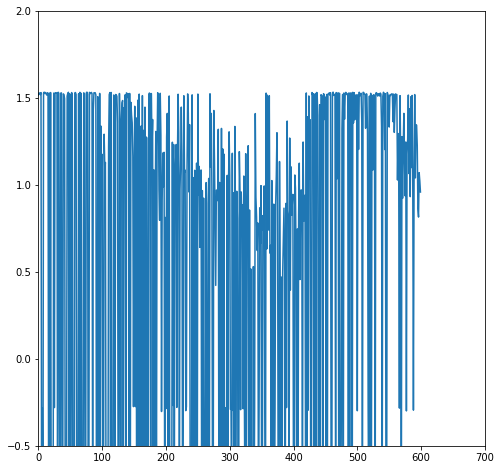

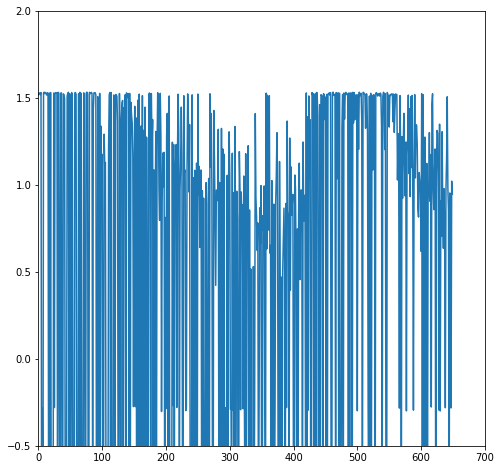

In [1]:
#https://github.com/ZhizhenQin/BalancingBot/blob/master/balance-bot/balance_bot/balancebot_task.py


#%load_ext tensorboard

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import tensorflow as tf
#import tensorflow.contrib.layers as layers


#from tensorflow import keras
#from tensorflow.keras import layers
#from keras.utils import to_categorical
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
from tensorflow.keras.utils import to_categorical


import gym
from stable_baselines import DQN, PPO2
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.callbacks import BaseCallback
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.common.policies import FeedForwardPolicy, register_policy,LstmPolicy
from stable_baselines.common.tf_layers import conv, linear, conv_to_fc, lstm
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.env_checker import check_env
#import balance_bot

"""
for env in gym.envs.registry.env_specs:
     if 'MainEnvRL-v0' in env:
        print('Remove {} from registry'.format(env))
        del gym.registry.env_specs[env]
"""                
import MainEnv_RL

#def callback(lcl, glb):
     #stop training if reward exceeds 199
#    is_solved = lcl['t'] > 1000 and sum(lcl['episode_rewards'][-101:-1]) / 100 >= 1
#    return is_solved

#https://stable-baselines.readthedocs.io/en/master/guide/custom_policy.html
#Layers of 20 and 15
class ScottLSTMPolicy(LstmPolicy):
    def __init__(self, sess, ob_space, ac_space, n_env, n_steps, n_batch, n_lstm=64, reuse=False, **_kwargs):
        super().__init__(sess, ob_space, ac_space, n_env, n_steps, n_batch, n_lstm, reuse,
                         net_arch=[7,'lstm',dict(vf=[20, 15],pi=[20,15])],
                         layer_norm=True, feature_extraction="mlp", **_kwargs)
register_policy('ScottLSTMPolicy', ScottLSTMPolicy)    
        
def main():
    totalepisodes=700
    env= gym.make("MainEnvRL-v2",render=False,totalepisodes=totalepisodes)
    env = DummyVecEnv([lambda: env])
    
    timesteps=80*totalepisodes #80 steps per episode, 200 episodes. total timesteps of 50000 is default
    #model = DQN("LnMlpPolicy", env, learning_rate=1e-3, prioritized_replay=True,gamma=1 , buffer_size=50000,param_noise=False,
    # exploration_initial_eps=0.1, exploration_final_eps=0.1,learning_starts=1, verbose=1)
    
    
    
    #model = PPO2("MlpPolicy", env,verbose=0)
    #model = PPO2("MlpLstmPolicy", env,nminibatches=1, n_steps=80, #exploration_initial_eps=1, exploration_final_eps=0.1,
    #             verbose=0,tensorboard_log="./ScottPPOLstm/") #n_lstm=2, n_batch=80, nminibatches=10,
    
    model = PPO2("ScottLSTMPolicy", env,nminibatches=1, n_steps=80, #exploration_initial_eps=1, exploration_final_eps=0.1,
                 verbose=0) #n_lstm=2, n_batch=80, nminibatches=10,
    
    #model.learn(total_timesteps=timesteps,tb_log_name="first_run", reset_num_timesteps=False)#50000
    model.learn(total_timesteps=timesteps,reset_num_timesteps=False)#50000
    model.save("MainScott_RL")# save trained model
    del model
    
   
    
    #check_env(env)
    #https://stable-baselines.readthedocs.io/en/master/modules/dqn.html
    #model.learn(total_timesteps=25000)
    #del model # remove to demonstrate saving and loading
    #model = DQN.load("deepq_cartpole")

    """
    """
    
    

if __name__ == '__main__':
    main()

## Test the policy

In [ ]:

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import tensorflow as tf
#import tensorflow.contrib.layers as layers
import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#from keras.utils import to_categorical
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
from tensorflow.keras.utils import to_categorical


import gym
from stable_baselines import DQN,PPO2
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.callbacks import BaseCallback
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.common.policies import FeedForwardPolicy, register_policy,LstmPolicy
from stable_baselines.common.tf_layers import conv, linear, conv_to_fc, lstm
#from stable_baselines.common import get_vec_normalize_env
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.vec_env import DummyVecEnv
#import balance_bot
import MainEnv_RL

env= gym.make("MainEnvRL-v2", render=True)
env = DummyVecEnv([lambda: env])

#env=get_vec_normalize_env(env) 
#model = DQN.load("MainScott_RL")
model = PPO2.load("MainScott_RL")
#env=model.get_env()
#obs = env.reset()
done = [False for _ in range(1)] #env.num_envs
state=None

while True:
    obs = env.reset()
    #env._seed()
    for i in range(80):
        action, _states = model.predict(obs,state=state,mask=done)
        #actionlist.append(action)
        obs, rewards, dones, info = env.step(action)
    print(rewards)
        
"""

while True:
    obs = env.reset()
    env._seed()
    actionlist=[]
    #print("reset")
    for i in range(80):
        action, _states = model.predict(obs)
        actionlist.append(action)
        obs, rewards, dones, info = env.step(action)
    print(rewards)       
"""       
        
        
    #print("actionlist",actionlist)
    #env.render()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/scott/anaconda3/envs/thesis/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."
/home/scott/anaconda3/envs/thesis/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))






Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



[1.4402494]
[1.5205795]
[1.5284132]
[-1.]
[1.5176514]
